In [8]:
import os
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


import numpy as np
import tensorflow as tf
from keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
import keras
from keras import layers

In [6]:
def open_pkl(file_name):
    #safe plane timeseg as pickle
    path = os.path.join(os.getcwd(), "dataset2")
    path_file = os.path.join(path, file_name)
    with open(path_file, "rb") as f:
        liste = pickle.load(f)
    return liste

X_vibfeature = open_pkl('X_vibfeature.pickle')
y_defectlabel = open_pkl('y_defectlabel.pickle')
c_context_raw = open_pkl('c_context_raw.pickle')

In [9]:
# convert list to numpy array
X = np.array(X_vibfeature)

# Reshape data into a 2D array
X_vibfeature_2d = X.reshape(X.shape[0], -1)  # (1944, 45, 175) --> (1944, 45*175)
X_vibfeature_2d[0]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on data and transform it
scaled_X_2d = scaler.fit_transform(X_vibfeature_2d)

# Reshape the scaled data back to its original shape
scaled_X = scaled_X_2d.reshape(X.shape)
scaled_X[0]

X_vib = scaled_X


# Convert the nested list into a numpy array
labels_array = np.array(c_context_raw)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert the string label to numerical label
labels_array[:, -1] = label_encoder.fit_transform(labels_array[:, -1])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your labels and transform them
c_context_scaled = scaler.fit_transform(labels_array)
c_context_scaled[0]

c_con = c_context_scaled



X_train, X_test, c_train, c_test, y_train, y_test = train_test_split(X_vib, c_con, y_defectlabel, test_size=0.1, random_state=42)


In [15]:
import matplotlib.pyplot as plt

def plot_spectrogram(f, t, Sxx):
    """
    Plot Spectrogram using Matplotlib.

    Parameters:
    - f: 1-D array_like, Array of sample frequencies.
    - t: 1-D array_like, Array of time points.
    - Sxx: 2-D array_like, Spectrogram of x. Columns are the periodograms of consecutive segments.

    Returns:
    - None (displays the plot)
    """
    plt.pcolormesh(t, f, 10 * np.log10(Sxx[:-1, :-1]), shading = 'flat')  # Using log scale for better visualization
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Power (dB)')
    plt.title('Spectrogram')
    plt.rcParams["figure.figsize"]=(12 * 0.5, 8 * 0.5)
    plt.show()

f = np.array([117.43119266,  430.58103976,  743.73088685, 1056.88073394,
       1370.03058104, 1683.18042813, 1996.33027523, 2309.48012232,
       2622.62996942, 2935.77981651, 3248.92966361, 3562.0795107 ,
       3875.2293578 , 4188.37920489, 4501.52905199, 4814.67889908,
       5127.82874618, 5440.97859327, 5754.12844037, 6067.27828746,
       6380.42813456, 6693.57798165, 7006.72782875, 7319.87767584,
       7633.02752294, 7946.17737003, 8259.32721713, 8572.47706422,
       8885.62691131, 9198.77675841, 9511.9266055 , 9825.0764526 ])

t = np.array([0.00338867, 0.00932617, 0.01526367, 0.02120117, 0.02713867,
       0.03307617, 0.03901367, 0.04495117, 0.05088867, 0.05682617,
       0.06276367, 0.06870117, 0.07463867, 0.08057617, 0.08651367,
       0.09245117, 0.09838867, 0.10432617, 0.11026367, 0.11620117,
       0.12213867, 0.12807617, 0.13401367, 0.13995117, 0.14588867,
       0.15182617, 0.15776367, 0.16370117, 0.16963867, 0.17557617,
       0.18151367, 0.18745117, 0.19338867, 0.19932617, 0.20526367,
       0.21120117, 0.21713867, 0.22307617, 0.22901367, 0.23495117,
       0.24088867, 0.24682617, 0.25276367, 0.25870117, 0.26463867,
       0.27057617, 0.27651367, 0.28245117, 0.28838867, 0.29432617,
       0.30026367, 0.30620117, 0.31213867, 0.31807617, 0.32401367,
       0.32995117, 0.33588867, 0.34182617, 0.34776367, 0.35370117,
       0.35963867, 0.36557617, 0.37151367, 0.37745117, 0.38338867,
       0.38932617, 0.39526367, 0.40120117, 0.40713867, 0.41307617,
       0.41901367, 0.42495117, 0.43088867, 0.43682617, 0.44276367,
       0.44870117, 0.45463867, 0.46057617, 0.46651367, 0.47245117,
       0.47838867, 0.48432617, 0.49026367, 0.49620117, 0.50213867,
       0.50807617, 0.51401367, 0.51995117, 0.52588867, 0.53182617,
       0.53776367, 0.54370117, 0.54963867, 0.55557617, 0.56151367,
       0.56745117, 0.57338867, 0.57932617, 0.58526367, 0.59120117,
       0.59713867, 0.60307617, 0.60901367, 0.61495117, 0.62088867,
       0.62682617, 0.63276367, 0.63870117, 0.64463867, 0.65057617,
       0.65651367, 0.66245117, 0.66838867, 0.67432617, 0.68026367,
       0.68620117, 0.69213867, 0.69807617, 0.70401367, 0.70995117,
       0.71588867, 0.72182617, 0.72776367, 0.73370117, 0.73963867,
       0.74557617, 0.75151367, 0.75745117])

In [31]:
def compile_fit_test(model, X_train, X_test, epochs, batch_size=128):

    loss_fn = tf.keras.losses.MeanSquaredError()
    optimizer = tf.keras.optimizers.Adam()
    
    #compile:
    model.compile(optimizer=optimizer, loss=loss_fn)
    #fit:
    history = model.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)#, callbacks=[tensorboard_callback])

    #test: 
    encoded_imgs = model.predict(X_test)
    decoded_test = model.predict(encoded_imgs)
    print(decoded_test.shape)
    decoded_test = decoded_test.reshape(decoded_test.shape[:-1])

    #plot test:
    i = 4
    plot_spectrogram(f, t, X_test[i])
    plot_spectrogram(f, t, decoded_test[i])

    # Plot validation loss
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.legend()
    plt.show()

    # Calculate the mean of the test data along the batch dimension
    mean_test_data = np.mean(X_test, axis=0)
    # Create baseline predictions by repeating the mean across the batch dimension
    baseline_predictions = np.repeat(mean_test_data[np.newaxis, ...], X_test.shape[0], axis=0)
    # Calculate Mean Squared Error between baseline predictions and actual test data
    baseline_mse = mean_squared_error(X_test.flatten(), baseline_predictions.flatten())

    print("Baseline Mean Squared Error:", baseline_mse)


    last_loss = history.history['val_loss'][-1]
    rel_improvement = (baseline_mse - last_loss) / baseline_mse * 100

    print("relative baseline improvement", str(rel_improvement))

# =========

# models

In [11]:
def create_model():
    # Define the input layer
    inputs = tf.keras.Input(shape=(32, 128, 1))

    # Convolutional and pooling layers with BatchNormalization
    conv1 = tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same')(inputs)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.Activation('relu')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=3, padding='same')(conv1)

    conv2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(pool1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.Activation('relu')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=3, padding='same')(conv2)

    # Flatten the output from convolutional layers
    flatten = tf.keras.layers.Flatten()(pool2)
    # Dense layer
    dense = tf.keras.layers.Dense(units=512, activation='relu')(flatten)

    # Reshape the dense layer output to match the shape for upsampling
    reshape = tf.keras.layers.Reshape((2, 8, 32))(dense)

    # Upsampling and convolutional layers with BatchNormalization
    conv3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(tf.keras.layers.UpSampling2D((2, 2))(reshape)) # pool2
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.Activation('relu')(conv3)

    conv4 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(tf.keras.layers.UpSampling2D((2, 2))(conv3))
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    conv4 = tf.keras.layers.Activation('relu')(conv4)

    conv5 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(tf.keras.layers.UpSampling2D((4, 4))(conv4))
    conv5 = tf.keras.layers.BatchNormalization()(conv5)
    conv5 = tf.keras.layers.Activation('relu')(conv5)

    conv6 = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv5)

    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=conv6)
    
    return model



# Create the model
model_stride = create_model()
model_stride.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-03-29 10:27:20.467663: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-29 10:27:20.483636: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 16, 64, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 16, 64, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 16, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 22, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 22, 32)         9248  

Epoch 1/100


2024-03-29 17:48:16.926548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - ETA: 0s - loss: 0.0052

2024-03-29 17:48:22.303678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 6s 407ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 2/100
11/11 [==============================] - 1s 105ms/step - loss: 0.0050 - val_loss: 0.0051
Epoch 3/100
11/11 [==============================] - 1s 103ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 4/100
11/11 [==============================] - 1s 88ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 5/100
11/11 [==============================] - 1s 88ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 6/100
11/11 [==============================] - 1s 83ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 7/100
11/11 [==============================] - 1s 82ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 8/100
11/11 [==============================] - 1s 85ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 9/100
11/11 [==============================] - 1s 87ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 10/100
11/11 [==============================] - 1s 85ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 11

2024-03-29 17:49:51.648035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 60ms/step


2024-03-29 17:49:52.926576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 54ms/step
(195, 32, 128, 1)


/var/folders/ng/jf3w40c95c74vw00ssxmtwq80000gn/T/ipykernel_78513/3903224587.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx[:-1, :-1]), shading = 'flat')  # Using log scale for better visualization


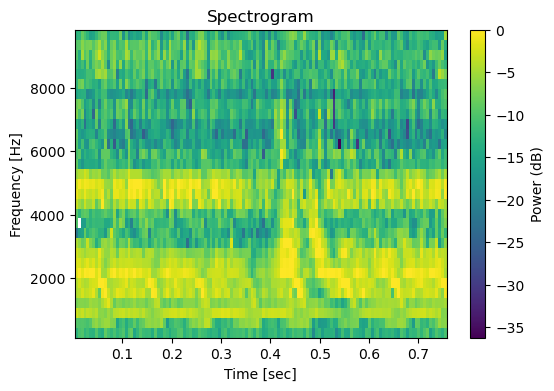

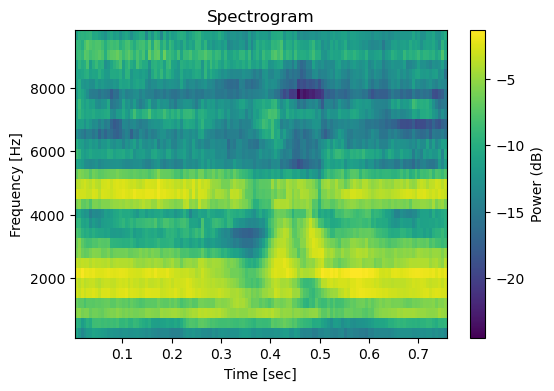

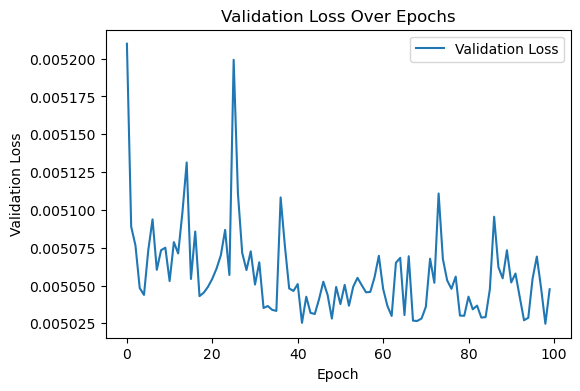

Baseline Mean Squared Error: 0.01413860155459857
relative baseline improvement 64.29943148442906


In [43]:
compile_fit_test(model_stride, X_train, X_test, 100)

In [29]:
model_simple = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 128, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),



    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 128, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 32, 32)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 32, 32)         9248      
                                                                 
 up_sampling2d_3 (UpSampling  (None, 16, 64, 32)       0

Epoch 1/500


2024-03-29 16:01:51.364285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - ETA: 0s - loss: 0.0036

2024-03-29 16:01:54.388525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 4s 71ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 2/500
44/44 [==============================] - 2s 47ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 3/500
44/44 [==============================] - 2s 44ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 4/500
44/44 [==============================] - 2s 43ms/step - loss: 0.0027 - val_loss: 0.0026
Epoch 5/500
44/44 [==============================] - 2s 41ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 6/500
44/44 [==============================] - 2s 42ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 7/500
44/44 [==============================] - 2s 42ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 8/500
44/44 [==============================] - 2s 41ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 9/500
44/44 [==============================] - 2s 44ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 10/500
44/44 [==============================] - 2s 46ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 11/50

2024-03-29 16:17:01.496630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/7 [================>.............] - ETA: 0s

2024-03-29 16:17:01.877394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 30ms/step
(195, 32, 128, 1)


/var/folders/ng/jf3w40c95c74vw00ssxmtwq80000gn/T/ipykernel_78513/3903224587.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx[:-1, :-1]), shading = 'flat')  # Using log scale for better visualization


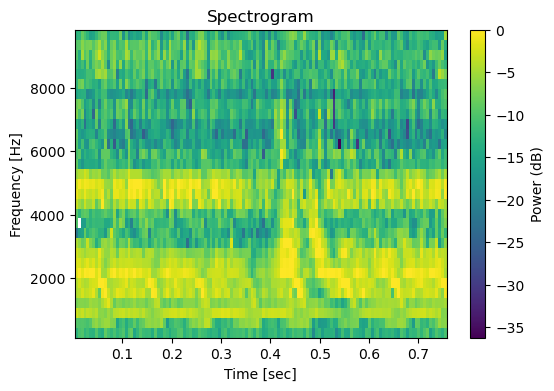

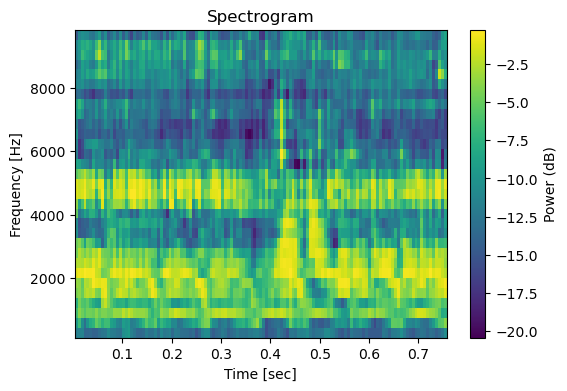

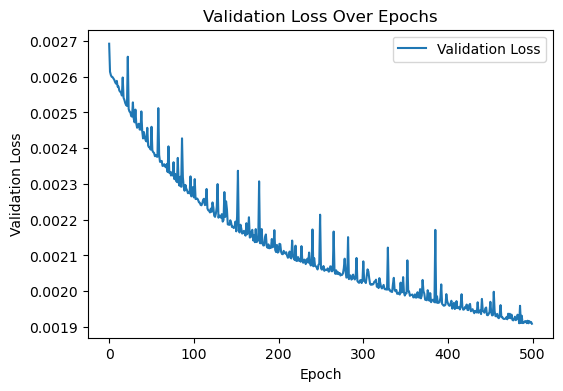

Baseline Mean Squared Error: 0.01413860155459857
relative baseline improvement 86.498075291324


In [34]:
compile_fit_test(model_simple, X_train, X_test, 500, None)

In [35]:
def create_model():
    # Define the input layer
    inputs = tf.keras.Input(shape=(32, 128, 1))

    # Convolutional and pooling layers
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv1)
    conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv2)
    conv2a = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)

    # Flatten the output from convolutional layers
    flatten = tf.keras.layers.Flatten()(conv2a)
    # Dense layer
    dense = tf.keras.layers.Dense(units=8192, activation='relu')(flatten)

    reshape = tf.keras.layers.Reshape((8, 32, 32))(dense)


    # Upsampling and convolutional layers
    conv3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(reshape))#pool2
    conv4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(conv3))
    conv5 = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv4)

    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=conv5)
    
    return model

# Create the model
model_1dense = create_model()
model_1dense.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 128, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 64, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 32, 32)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 32, 32)         9248

Epoch 1/100


2024-03-29 17:28:01.268455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - ETA: 0s - loss: 0.0064

2024-03-29 17:28:05.464728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 5s 92ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 2/100
44/44 [==============================] - 3s 66ms/step - loss: 0.0059 - val_loss: 0.0057
Epoch 3/100
44/44 [==============================] - 3s 62ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 4/100
44/44 [==============================] - 3s 62ms/step - loss: 0.0055 - val_loss: 0.0054
Epoch 5/100
44/44 [==============================] - 3s 62ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 6/100
44/44 [==============================] - 3s 63ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 7/100
44/44 [==============================] - 3s 63ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 8/100
44/44 [==============================] - 3s 63ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 9/100
44/44 [==============================] - 3s 62ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 10/100
44/44 [==============================] - 3s 61ms/step - loss: 0.0045 - val_loss: 0.0047
Epoch 11/10

2024-03-29 17:32:44.143165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 45ms/step


2024-03-29 17:32:44.701273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 52ms/step
(195, 32, 128, 1)


/var/folders/ng/jf3w40c95c74vw00ssxmtwq80000gn/T/ipykernel_78513/3903224587.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx[:-1, :-1]), shading = 'flat')  # Using log scale for better visualization


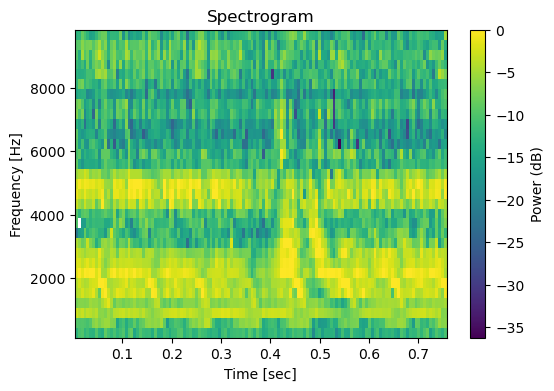

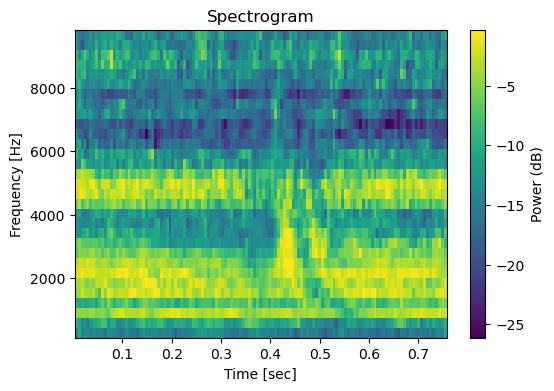

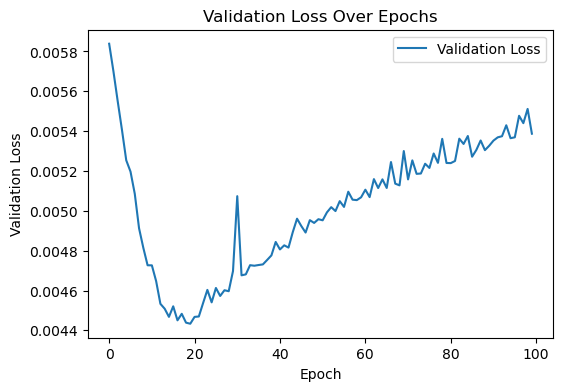

Baseline Mean Squared Error: 0.01413860155459857
relative baseline improvement 61.89673069621936


In [39]:
compile_fit_test(model_1dense, X_train, X_test, 100, None)

In [41]:
import tensorflow as tf

def create_model():
    # Define the input layer
    inputs = tf.keras.Input(shape=(32, 128, 1))

    # Convolutional and pooling layers with BatchNormalization
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(inputs)
    conv1 = tf.keras.layers.BatchNormalization()(conv1)
    conv1 = tf.keras.layers.Activation('relu')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv1)
    
    conv2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(pool1)
    conv2 = tf.keras.layers.BatchNormalization()(conv2)
    conv2 = tf.keras.layers.Activation('relu')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv2)
    
    conv2a = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(pool2)
    conv2a = tf.keras.layers.BatchNormalization()(conv2a)
    conv2a = tf.keras.layers.Activation('relu')(conv2a)

    # Flatten the output from convolutional layers
    flatten = tf.keras.layers.Flatten()(conv2a)
    # Dense layer
    dense = tf.keras.layers.Dense(units=8192, activation='relu')(flatten)

    reshape = tf.keras.layers.Reshape((8, 32, 32))(dense)

    # Upsampling and convolutional layers
    conv3 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(tf.keras.layers.UpSampling2D((2, 2))(reshape))
    conv3 = tf.keras.layers.BatchNormalization()(conv3)
    conv3 = tf.keras.layers.Activation('relu')(conv3)
    
    conv4 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(tf.keras.layers.UpSampling2D((2, 2))(conv3))
    conv4 = tf.keras.layers.BatchNormalization()(conv4)
    conv4 = tf.keras.layers.Activation('relu')(conv4)
    
    conv5 = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv4)

    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=conv5)
    
    return model


# Create the model
model_1dense_normal = create_model()
model_1dense_normal.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 128, 32)       320       
                                                                 
 batch_normalization_5 (Batc  (None, 32, 128, 32)      128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 32, 128, 32)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 64, 32)        9248

Epoch 1/100


2024-03-29 17:36:04.617704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - ETA: 0s - loss: 0.0303

2024-03-29 17:36:09.247040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 6s 97ms/step - loss: 0.0303 - val_loss: 0.0180
Epoch 2/100
44/44 [==============================] - 3s 70ms/step - loss: 0.0076 - val_loss: 0.0137
Epoch 3/100
44/44 [==============================] - 3s 70ms/step - loss: 0.0065 - val_loss: 0.0142
Epoch 4/100
44/44 [==============================] - 3s 64ms/step - loss: 0.0060 - val_loss: 0.0143
Epoch 5/100
44/44 [==============================] - 3s 65ms/step - loss: 0.0055 - val_loss: 0.0148
Epoch 6/100
44/44 [==============================] - 3s 66ms/step - loss: 0.0052 - val_loss: 0.0144
Epoch 7/100
44/44 [==============================] - 3s 70ms/step - loss: 0.0049 - val_loss: 0.0143
Epoch 8/100
44/44 [==============================] - 3s 75ms/step - loss: 0.0047 - val_loss: 0.0132
Epoch 9/100
44/44 [==============================] - 3s 69ms/step - loss: 0.0044 - val_loss: 0.0125
Epoch 10/100
44/44 [==============================] - 3s 69ms/step - loss: 0.0042 - val_loss: 0.0114
Epoch 11/10

2024-03-29 17:48:14.744159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 62ms/step


2024-03-29 17:48:15.558651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 43ms/step
(195, 32, 128, 1)


/var/folders/ng/jf3w40c95c74vw00ssxmtwq80000gn/T/ipykernel_78513/3903224587.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx[:-1, :-1]), shading = 'flat')  # Using log scale for better visualization


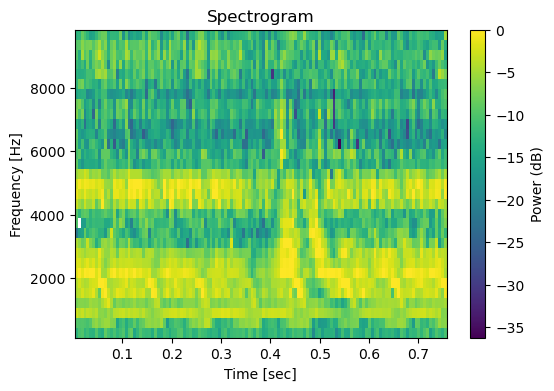

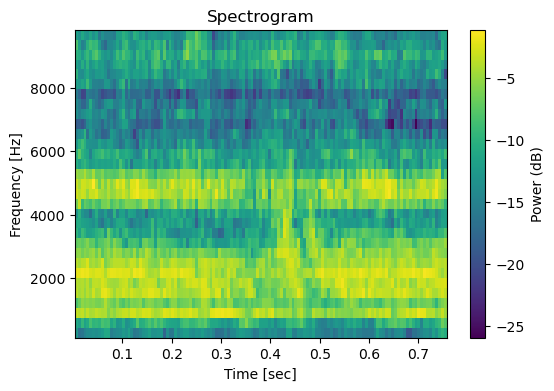

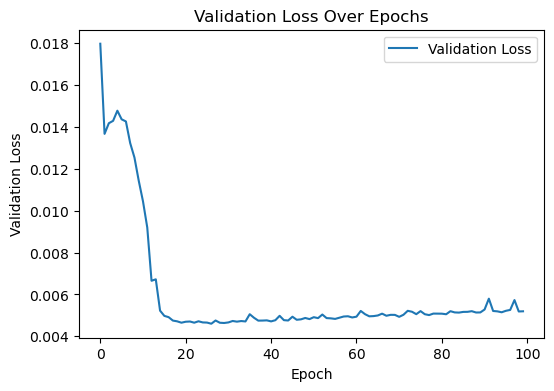

Baseline Mean Squared Error: 0.01413860155459857
relative baseline improvement 63.24579990336514


In [42]:
compile_fit_test(model_1dense_normal, X_train, X_test, 100, None)

In [44]:
import tensorflow as tf

def create_model():
    # Define the input layer
    inputs = tf.keras.Input(shape=(32, 128, 1))

    # Convolutional and pooling layers
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv1)
    conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv2)
    conv2a = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)

    # Flatten the output from convolutional layers
    flatten = tf.keras.layers.Flatten()(conv2a)
    # Dense layer
    dense = tf.keras.layers.Dense(units=8192, activation='relu')(flatten)

    reshape = tf.keras.layers.Reshape((8, 32, 32))(dense)

    # Upsampling and convolutional layers
    conv3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(reshape))#pool2
    conv4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(conv3))
    conv5 = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv4)

    # Define the model
    output1 = conv5
    output2 = dense
    model = tf.keras.Model(inputs=inputs, outputs=[output1, output2])
    
    return model



# Create the model
model_outdense = create_model()
model_outdense.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 128, 1)]      0         
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 128, 32)       320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 64, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 32, 32)         9248

In [80]:
import tensorflow as tf

def custom_loss(y_true, y_pred):
    # Define the loss function for output1 (conv5)
    loss = tf.keras.losses.mean_squared_error(y_true[0], y_pred[0])
    return loss

def dummy_loss(y_true, y_pred):
    # Dummy loss function for output2 (dense layer)
    return tf.reduce_mean(y_pred[1]) * 0.0

def create_model():
    # Define the input layer
    inputs = tf.keras.Input(shape=(32, 128, 1))

    # Convolutional and pooling layers
    conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    pool1 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv1)
    conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(conv2)
    conv2a = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)

    # Flatten the output from convolutional layers
    flatten = tf.keras.layers.Flatten()(conv2a)
    # Dense layer
    dense = tf.keras.layers.Dense(units=8192, activation='relu')(flatten)

    reshape = tf.keras.layers.Reshape((8, 32, 32))(dense)

    # Upsampling and convolutional layers
    conv3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(reshape))#pool2
    conv4 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(tf.keras.layers.UpSampling2D((2, 2))(conv3))
    conv5 = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv4)

    # Define the model
    output1 = conv5
    output2 = dense
    model = tf.keras.Model(inputs=inputs, outputs=[output1, output2])
    
    return model

# Create the model
decoder = create_model()

# Compile the model with custom loss function for output1 and dummy loss for output2
decoder.compile(optimizer='adam', loss=[custom_loss, dummy_loss])

# Train the model
# Replace X_train and y_train with your training data
decoder.fit(X_train, [X_train, X_train], epochs=300, batch_size=None)


Epoch 1/300


2024-03-31 15:56:09.513549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 6s 75ms/step - loss: 0.0328 - conv2d_52_loss: 0.0328 - dense_7_loss: 0.0000e+00
Epoch 2/300
55/55 [==============================] - 3s 58ms/step - loss: 0.0215 - conv2d_52_loss: 0.0215 - dense_7_loss: 0.0000e+00
Epoch 3/300
55/55 [==============================] - 3s 59ms/step - loss: 0.0176 - conv2d_52_loss: 0.0176 - dense_7_loss: 0.0000e+00
Epoch 4/300
55/55 [==============================] - 3s 59ms/step - loss: 0.0153 - conv2d_52_loss: 0.0153 - dense_7_loss: 0.0000e+00
Epoch 5/300
55/55 [==============================] - 3s 63ms/step - loss: 0.0097 - conv2d_52_loss: 0.0097 - dense_7_loss: 0.0000e+00
Epoch 6/300
55/55 [==============================] - 3s 59ms/step - loss: 0.0111 - conv2d_52_loss: 0.0111 - dense_7_loss: 0.0000e+00
Epoch 7/300
55/55 [==============================] - 3s 59ms/step - loss: 0.0091 - conv2d_52_loss: 0.0091 - dense_7_loss: 0.0000e+00
Epoch 8/300
55/55 [==============================] - 3s 56ms/step - loss: 0.0090 

In [87]:
outputs = decoder.predict(X_vibfeature)

# Get the outputs from the dense layer
dense_outputs = outputs[1]
print(dense_outputs[0])

61/61 [==============================] - 1s 21ms/step
[5.7825823 0.        0.        ... 3.7873108 0.        0.       ]


In [82]:
# Convert the data to a NumPy array
data_array = np.array(dense_outputs[0])

# Get unique numbers and their counts
unique_numbers, counts = np.unique(data_array, return_counts=True)

# Print the results
print("Unique numbers:", unique_numbers)
print("Counts:", counts)

Unique numbers: [0.0000000e+00 2.7125794e-03 2.8979033e-03 ... 6.5469537e+00 7.4446163e+00
 8.0266190e+00]
Counts: [6070    1    1 ...    1    1    1]


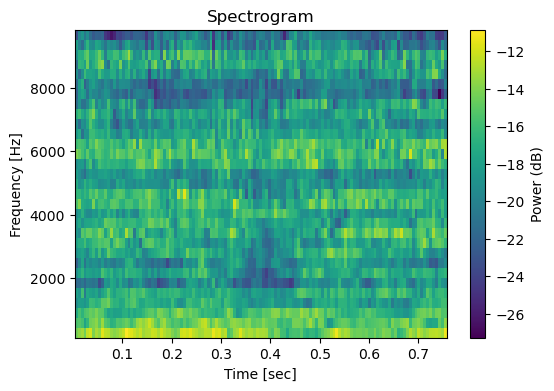

In [83]:
dense_outputs = outputs[0]
dense_outputs[0].shape
dense_outputs = dense_outputs.reshape(dense_outputs.shape[:-1])

plot_spectrogram(f, t, dense_outputs[4])

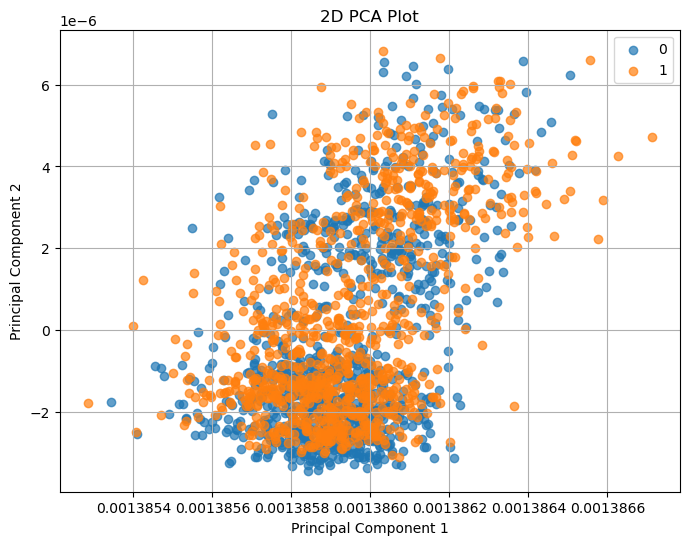

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_2d_pca(data, labels):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(8, 6))
    for label in np.unique(labels):
        indices = np.where(labels == label)
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, alpha=0.7)
    
    plt.title('2D PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
data = dense_outputs  # Example nested list data
labels = c_con #y_defectlabel #y_test  # Example label information
plot_2d_pca(data, y_defectlabel)


In [75]:
c_con[305]

array([0., 1., 1., 0., 0., 0., 1.])

In [85]:
data.shape

(1944, 32, 128)

In [67]:
len(labels)

1749

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 28,

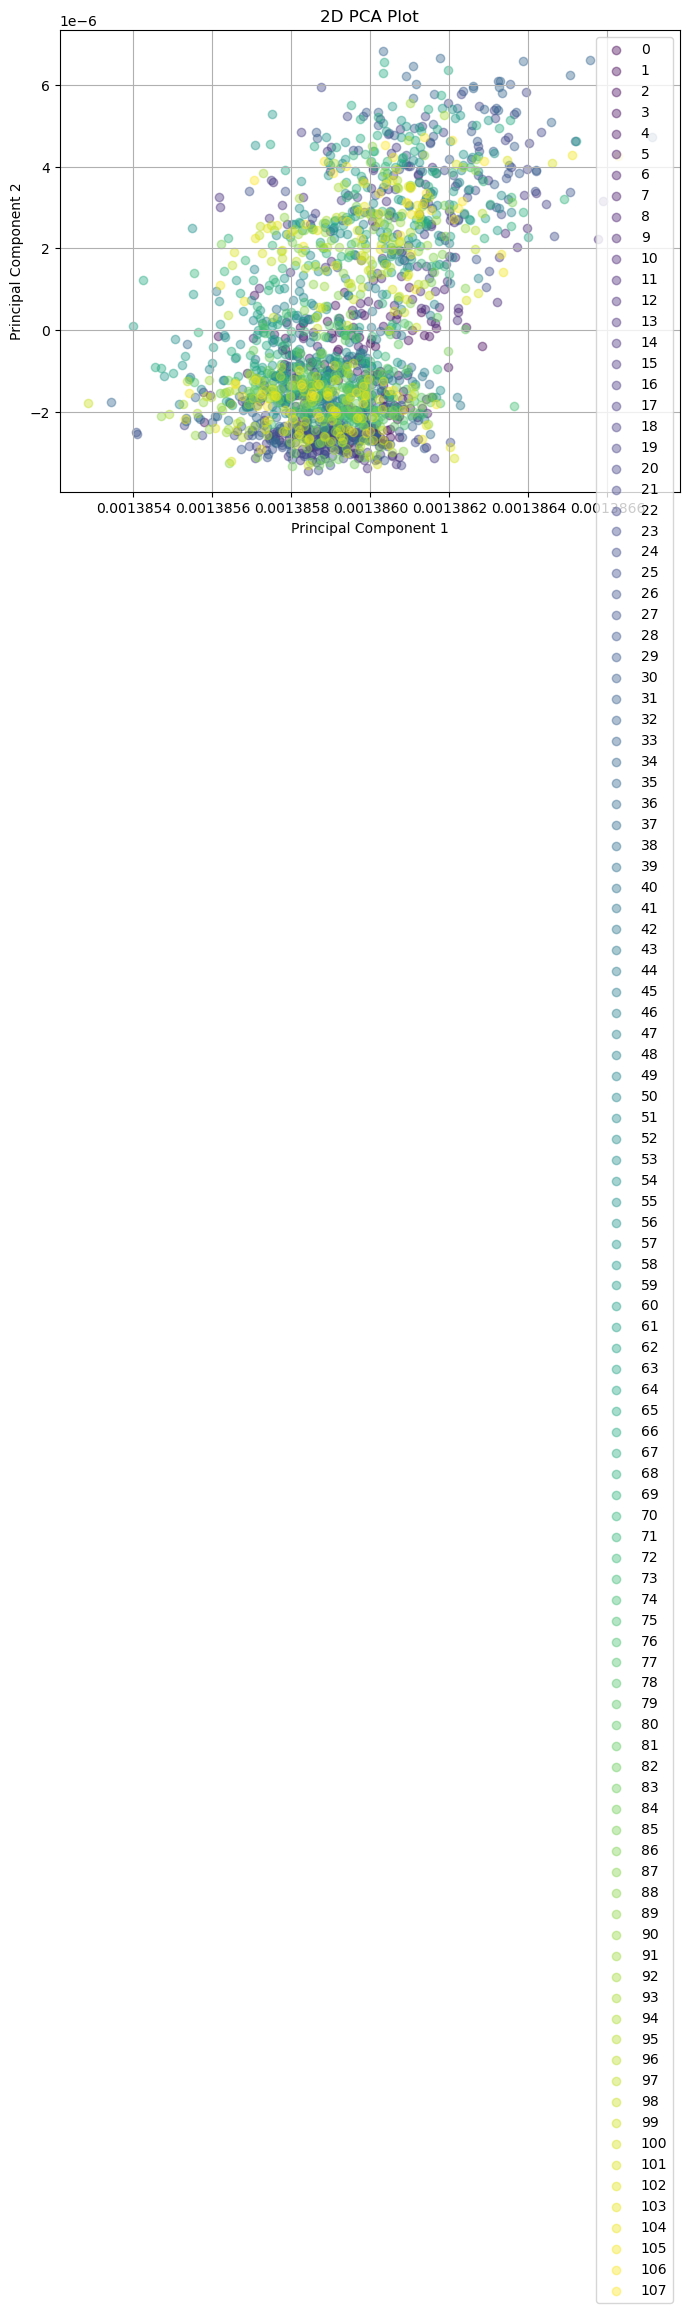

In [93]:
def map_array_to_label(arrays):
    unique_arrays = np.unique(arrays, axis=0)
    label_map = {tuple(array): i for i, array in enumerate(unique_arrays)}
    labels = [label_map[tuple(array)] for array in arrays]
    return labels

# Example usage
labels_con = map_array_to_label(c_con)
print(labels_con)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_2d_pca(data, labels):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    
    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(unique_labels):
        indices = np.where(labels == label)
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, alpha=0.4, color=colors[i])
    
    plt.title('2D PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
data = dense_outputs  # Example nested list data
labels = c_con #y_defectlabel #y_test  # Example label information
plot_2d_pca(data, labels_con)

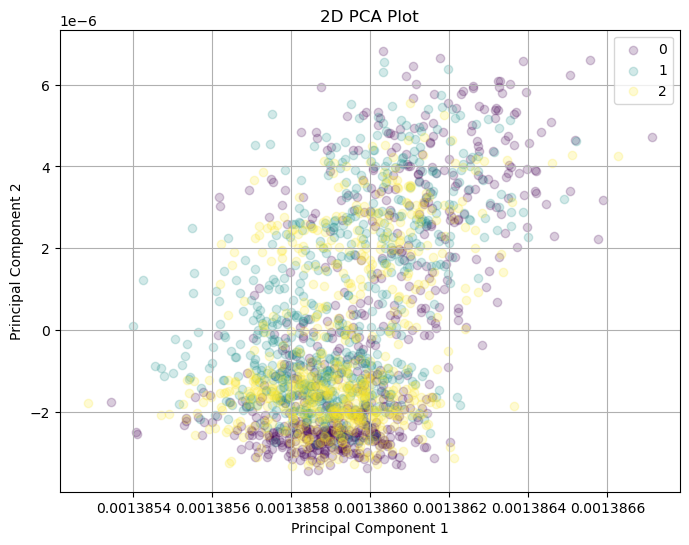

In [121]:
import numpy as np

def map_array_to_label(arrays, index):
    unique_values = np.unique(arrays[:, index])
    label_map = {value: i for i, value in enumerate(unique_values)}
    labels = [label_map[array[index]] for array in arrays]
    return labels


labels = map_array_to_label(c_con, 6)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_2d_pca(data, labels):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
    
    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(unique_labels):
        indices = np.where(labels == label)
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=label, alpha=0.2, color=colors[i])
    
    plt.title('2D PCA Plot')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
data = dense_outputs  # Example nested list data
plot_2d_pca(data, map_array_to_label(c_con, 0))


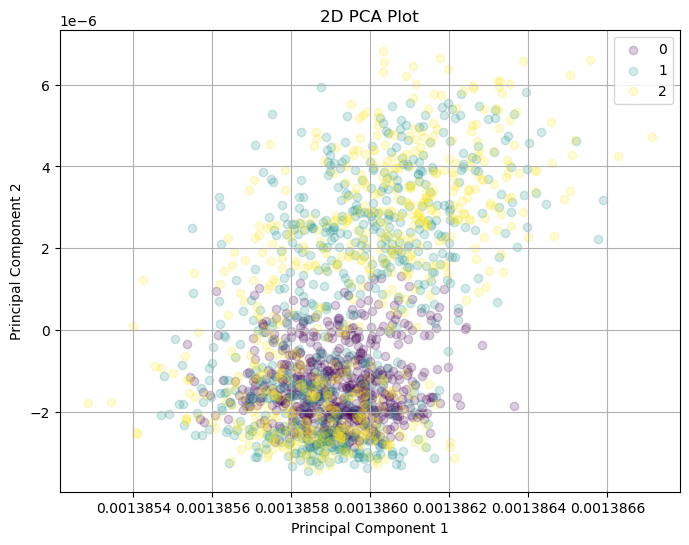

In [122]:
plot_2d_pca(data, map_array_to_label(c_con, 1))

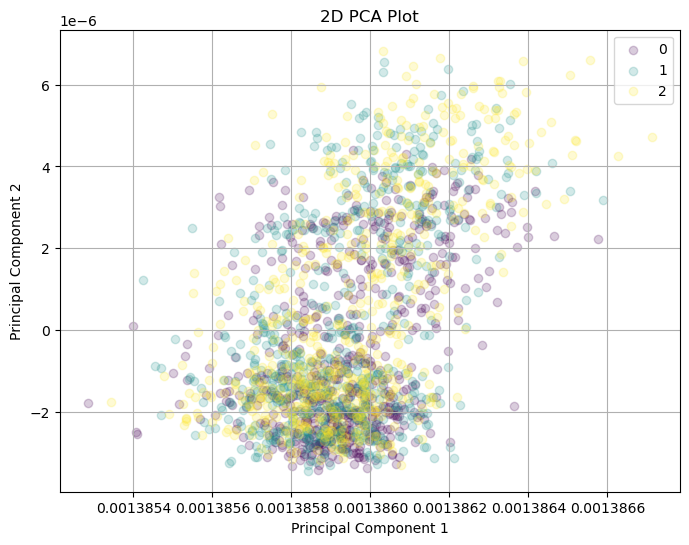

In [123]:
plot_2d_pca(data, map_array_to_label(c_con, 2))

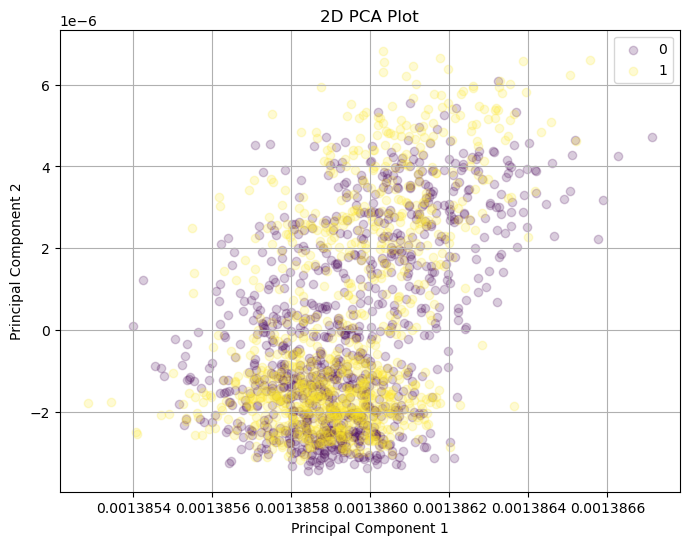

In [125]:
plot_2d_pca(data, map_array_to_label(c_con, 3))

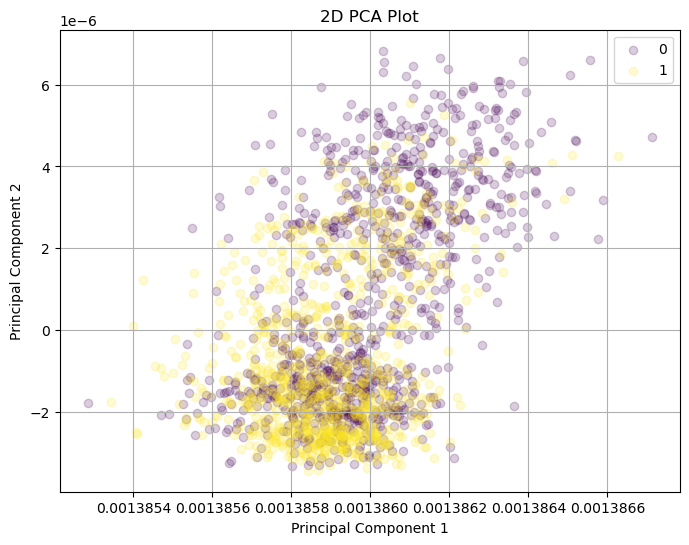

In [128]:
plot_2d_pca(data, map_array_to_label(c_con, 6))

In [ ]:
# scores...